<a href="https://colab.research.google.com/github/keja202/PRODIGY_ML/blob/main/Cat_Vs_Dog_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b> Cat Vs Dog Classification using SVM 🐱🐶 </b></div>

# **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/'archive (5).zip'

'/content/drive/MyDrive/archive (5).zip'


In [ ]:
!ls /content/dataset

test  train


In [ ]:
pip install silence_tensorflow

  Preparing metadata (setup.py) ... done
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.2-py3-none-any.whl size=5827 sha256=f43792ccbca442e18f8a56affb14fe3b6337f6692e9f2df15e5fa2addf6e9695
  Stored in directory: /root/.cache/pip/wheels/4e/e1/85/e501d21f8d79832caa65e1b779bc17d1847ebc0170f7bc5a80
Successfully built silence_tensorflow


# **Import Libraries**

In [ ]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [ ]:
import os
import re
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



print(colored('All libraries imported succesfully', 'green', attrs=["bold"]))

All libraries imported succesfully


In [ ]:
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
print(colored('All libraries configed succesfully', 'green', attrs=['bold']))

All libraries configed succesfully


#**Pre processing**

In [ ]:
train_folder = '/content/drive/MyDrive/archive (5).zip/train/train'

In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/drive/MyDrive/archive (5).zip'

# Path where you want to extract the files
extract_folder = '/content/extracted_data/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Path to the train folder after extraction
train_folder = os.path.join(extract_folder, 'train')

# Now list the files in the directory
total_count = len(os.listdir(train_folder))
print(f'Number of samples in train folder: {total_count}')

Number of samples in train folder: 1


In [ ]:
total_count = len(os.listdir(train_folder))
print(colored(f'Number of samples in train folder : {total_count}', 'blue', attrs=['bold']))

Number of samples in train folder : 1


In [ ]:
import os

# Print all file names in the directory
for file_name in os.listdir(train_folder):
    print(file_name)

train


In [ ]:
import os

# Assuming 'train_folder' is the parent directory, update it to include the 'train' subdirectory
train_folder = os.path.join(train_folder, 'train')

# Print the contents of the updated folder
for file_name in os.listdir(train_folder):
    print(file_name)

Streaming output truncated to the last 5000 lines.
cat.3589.jpg
dog.12117.jpg
dog.6609.jpg
dog.1161.jpg
cat.9489.jpg
cat.4888.jpg
cat.11049.jpg
dog.9748.jpg
dog.9124.jpg
dog.4105.jpg
dog.8408.jpg
dog.8842.jpg
dog.4516.jpg
cat.3394.jpg
dog.12139.jpg
dog.4625.jpg
cat.6893.jpg
dog.9499.jpg
dog.1984.jpg
dog.3786.jpg
cat.7938.jpg
dog.4096.jpg
cat.10816.jpg
dog.1075.jpg
cat.11178.jpg
dog.4566.jpg
cat.8074.jpg
dog.4049.jpg
cat.2248.jpg
dog.8846.jpg
dog.3895.jpg
cat.7047.jpg
dog.6630.jpg
cat.11323.jpg
dog.10446.jpg
dog.7060.jpg
dog.6056.jpg
cat.12466.jpg
cat.2268.jpg
dog.8896.jpg
dog.8608.jpg
dog.3748.jpg
cat.1663.jpg
cat.9320.jpg
dog.3125.jpg
cat.10821.jpg
dog.2778.jpg
dog.12250.jpg
cat.2036.jpg
cat.11236.jpg
dog.4882.jpg
dog.10678.jpg
cat.8815.jpg
dog.48.jpg
cat.8675.jpg
dog.5668.jpg
cat.8045.jpg
dog.11759.jpg
cat.3725.jpg
dog.3232.jpg
dog.8290.jpg
cat.6517.jpg
dog.7046.jpg
dog.4770.jpg
dog.10098.jpg
dog.4902.jpg
cat.12206.jpg
cat.3187.jpg
cat.4365.jpg
dog.758.jpg
dog.11370.jpg
dog.2880.jpg


In [ ]:
import os
from termcolor import colored

# Path to the parent folder (adjust it to where your files are extracted)
train_folder = '/content/extracted_data/train/train'  # Add the 'train' subdirectory here

cat_count, dog_count = 0, 0

# List the files directly inside the 'train' subdirectory
for file_name in os.listdir(train_folder):
    if file_name.startswith("cat"):  # Count files starting with 'cat'
        cat_count += 1
    elif file_name.startswith("dog"):  # Count files starting with 'dog'
        dog_count += 1

# Print the results
print(colored(f'Number of cats : {cat_count}', 'blue', attrs=['bold']))
print(colored(f'Number of dogs : {dog_count}', 'blue', attrs=['bold']))

total_count = cat_count + dog_count
print(colored(f'Total number of samples : {total_count}', 'green', attrs=['bold']))

Number of cats : 12500
Number of dogs : 12500
Total number of samples : 25000


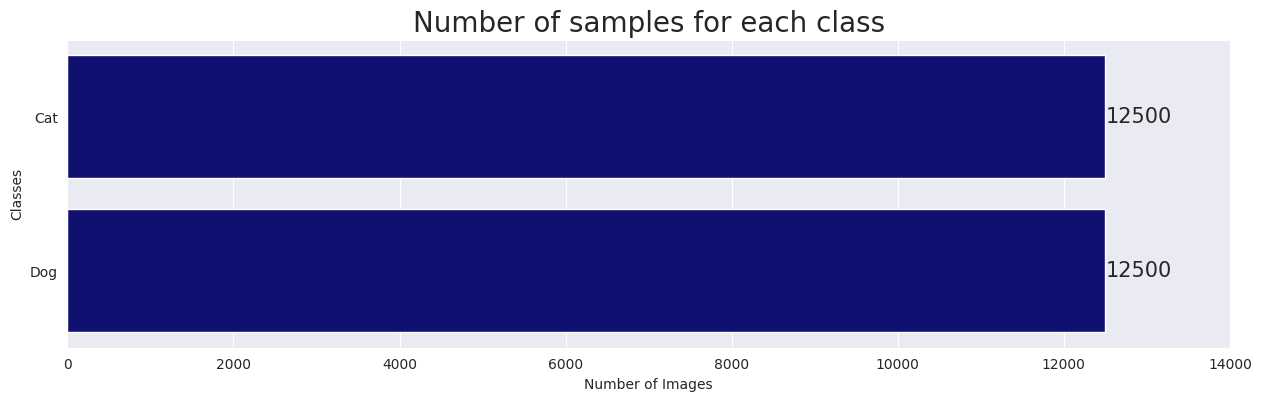

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List to hold the count of cats and dogs
total_count = [cat_count, dog_count]  # Create a list with the counts

# Plotting
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=total_count, y=['Cat', 'Dog'], orient='h', color='navy')

# Set the number of ticks on the x-axis
ax.set_xticks(np.arange(0, max(total_count) + 2000, 2000))
ax.set_xlabel('Number of Images')
ax.set_ylabel('Classes')
ax.set_title('Number of samples for each class', fontsize=20)

# Add the count labels to the bars
for i, p in enumerate(ax.patches):
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2.,
            '{}'.format(total_count[i]),
             va="center", fontsize=15)

plt.show()

In [ ]:
temp_df = []
for file_name in os.listdir(train_folder) :
    if re.findall("\Acat", file_name) :
        class_name = 'cat'
    else :
        class_name = 'dog'
    temp_df.append((os.path.join(train_folder, file_name), class_name))
df = pd.DataFrame(temp_df, columns=['file_path', 'label'])
df

,file_path,label
0,/content/extracted_data/train/train/cat.3322.jpg,cat
1,/content/extracted_data/train/train/cat.12135.jpg,cat
2,/content/extracted_data/train/train/cat.2687.jpg,cat
3,/content/extracted_data/train/train/cat.5897.jpg,cat
4,/content/extracted_data/train/train/dog.5895.jpg,dog
...,...,...
24995,/content/extracted_data/train/train/cat.8230.jpg,cat
24996,/content/extracted_data/train/train/dog.2381.jpg,dog
24997,/content/extracted_data/train/train/cat.4519.jpg,cat
24998,/content/extracted_data/train/train/dog.8388.jpg,dog


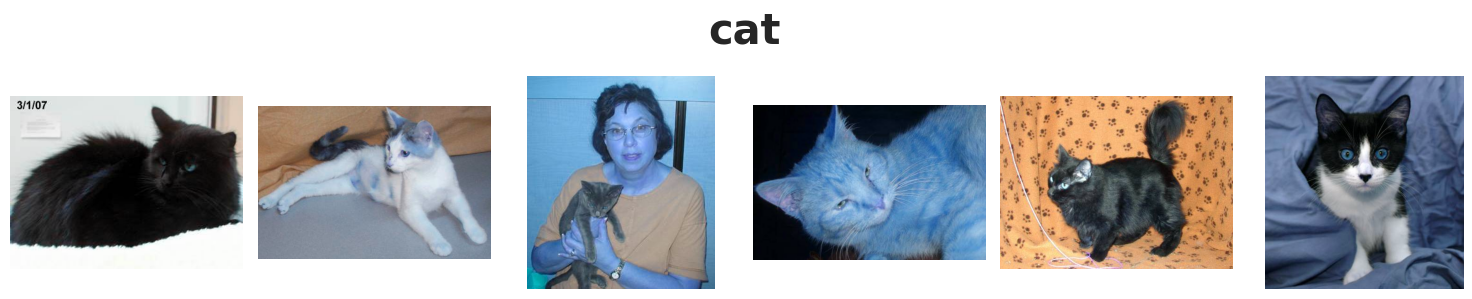

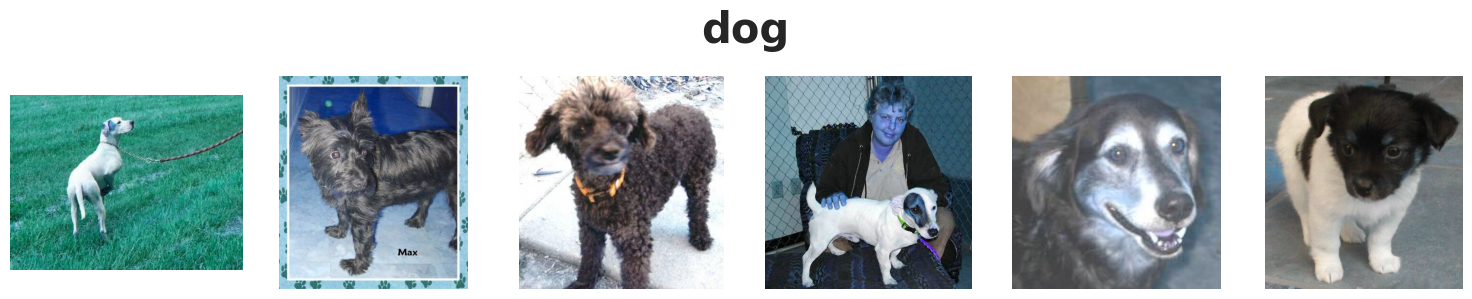

In [ ]:
# Randomly show 6 images of each classes

def plot_6_image(images, title) :
    plt.figure(figsize=(15, 3))
    for i, path in enumerate(images) :
        plt.subplot(1, 6, i+1)
        img = cv2.imread(path)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=30, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Setting the random seed for reproducibility
np.random.seed(42)

for classes in ['cat', 'dog'] :
    temp_df = df.file_path[df.label==classes]
    random_image = np.random.choice(temp_df, 6)
    plot_6_image(random_image, classes)


In [ ]:
def image_size(train_folder) :
    height = []
    width = []

    unique_dims = set()

    for file_name in os.listdir(train_folder) :
        img_path = os.path.join(train_folder, file_name)
        img = cv2.imread(img_path)
        if img is not None :
            unique_dims.add((img.shape[0], img.shape[1]))
            #
            width.append(img.shape[0])
            height.append(img.shape[1])

    if len(unique_dims)==1 :
        print(colored(f'All images have a unique shape of {list(unique_dims)[0]}', 'green', attrs=['bold']))
    else :
        print(colored(f'There are {len(unique_dims)} different image dimensions', 'red', attrs=['bold']))
        print(colored(f'Min height is {min(height)}, Min width is {min(width)}', 'red'))
        print(colored(f'Max height is {max(height)}, Max width is {max(width)}', 'red'))

In [ ]:
image_size(train_folder)

There are 8513 different image dimensions
Min height is 42, Min width is 32
Max height is 1050, Max width is 768


In [ ]:
print(colored(f'df shape : {df.shape}', 'green', attrs=['bold']))

df shape : (25000, 2)


In [ ]:
# Use train_test_split to split data to train, validation and test

train_df_full, val_df = train_test_split(df, stratify=df['label'], test_size=0.2, random_state=42)
train_df, test_df = train_test_split(train_df_full, stratify=train_df_full['label'], test_size=0.2, random_state=42)

print(colored(f'Training shape : {train_df.shape}', 'green', attrs=['bold']))
print(colored(f'Validation shape : {val_df.shape}', 'green', attrs=['bold']))
print(colored(f'Test shape : {test_df.shape}', 'green', attrs=['bold']))

Training shape : (16000, 2)
Validation shape : (5000, 2)
Test shape : (4000, 2)


In [ ]:
def add_gausian_noises(image, mean=0, std=0.05) :
    ''' Add Gausian noise to an image '''
    gaussian = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

In [ ]:
def apply_blur (image, kernel_size=5) :
    ''' Apply gaussian blur to an image '''
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [ ]:
def downsample_upsample(image, scale_percent=50) :
    ''' Downsample and upsample an image '''
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return cv2.resize(resized, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)

# **Training**

In [ ]:
# Add above noises to train data

def augment_images(dataframe, base_dir):
    modified_data = []

    for _, row in dataframe.iterrows():
        img_path = row['file_path']
        label = row['label']
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Randomly apply one or more degradation methods
        choices = ['noise', 'blur', 'downsample']
        chosen_methods = random.sample(choices, k=random.randint(1, len(choices)))

        if 'noise' in chosen_methods:
            directory, filename = os.path.split(img_path)
            new_img_path = os.path.join(directory, f"noisy_{filename}")
            cv2.imwrite(new_img_path, img)
            img = add_gausian_noises(img)
            modified_data.append((new_img_path, label))
        if 'blur' in chosen_methods:
            directory, filename = os.path.split(img_path)
            new_img_path = os.path.join(directory, f"blur_{filename}")
            cv2.imwrite(new_img_path, img)
            img = apply_blur(img)
            modified_data.append((new_img_path, label))
        if 'downsample' in chosen_methods:
            directory, filename = os.path.split(img_path)
            new_img_path = os.path.join(directory, f"downup_{filename}")
            cv2.imwrite(new_img_path, img)
            img = downsample_upsample(img)
            modified_data.append((new_img_path, label))

    modified_images_df = pd.DataFrame(modified_data, columns=['file_path', 'label'])

    # Return the updated DataFrame with both original and modified images
    return pd.concat([dataframe, modified_images_df], ignore_index=True)

In [ ]:
train_df = augment_images(train_df, train_folder)

In [ ]:
print(colored(f'Training shape : {train_df.shape}', 'green', attrs=['bold']))
print(colored(f'Validation shape : {val_df.shape}', 'green', attrs=['bold']))
print(colored(f'Test shape : {test_df.shape}', 'green', attrs=['bold']))

Training shape : (48128, 2)
Validation shape : (5000, 2)
Test shape : (4000, 2)


Images After augmentation :


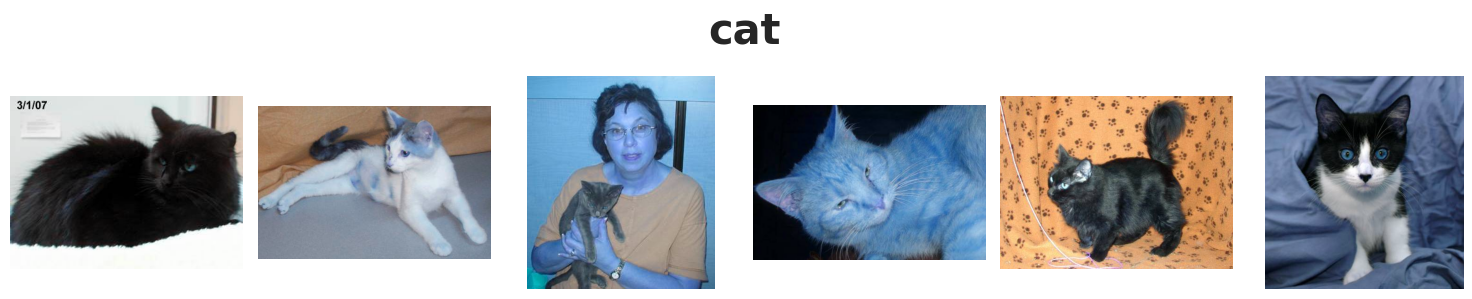

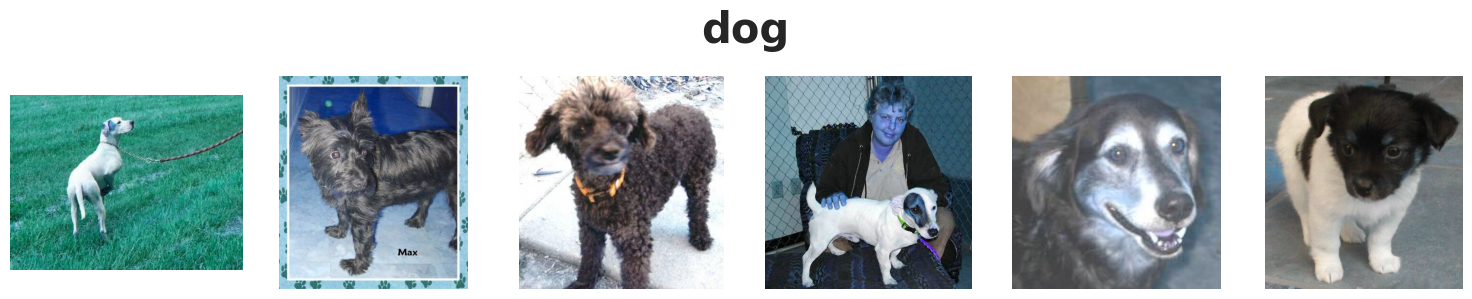

In [ ]:
# Show 6 image of each classes after adding noises

# Setting the random seed for reproducibility
np.random.seed(42)
print(colored('Images After augmentation :', 'green', attrs=['bold']))

for classes in ['cat', 'dog'] :
    temp_df = df.file_path[df.label==classes]
    random_image = np.random.choice(temp_df, 6)
    plot_6_image(random_image, classes)

In [ ]:
def create_data_generator(train_df, val_df, test_df, batch_size=32, image_dimentions=(150, 150)) :
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )

    validation_datagen = ImageDataGenerator(
        rescale=1.0/255,
    )

    test_datagen = ImageDataGenerator(
        rescale=1.0/255
    )


    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='file_path',
        y_col='label',
        target_size=image_dimentions,
        class_mode='binary',
        batch_size=batch_size,
        seed=42,
        shuffle=True,
    )

    validation_generator = validation_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='file_path',
        y_col='label',
        target_size=image_dimentions,
        class_mode='binary',
        batch_size=batch_size,
        seed=42,
        shuffle=False,
    )

    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        x_col='file_path',
        y_col='label',
        target_size=image_dimentions,
        class_mode='binary',
        batch_size=batch_size,
        seed=42,
        shuffle=False,
    )

    return train_generator, validation_generator, test_generator

In [ ]:
train_generator, val_generator, test_generator = create_data_generator(train_df, val_df, test_df)

# Fetch a batch of images and labels
batch_images, batch_labels = next(train_generator)

# Check the shape of the first image in the batch
print("Shape of the first image in the batch:", batch_images[0].shape)

Found 48128 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.
Shape of the first image in the batch: (150, 150, 3)


In [ ]:
conv_base = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in conv_base.layers :
    print(layer.name)

input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [ ]:
# Freeze all layers, except last layer
# The goal is to train just last layer

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers :
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
# 1) Model CheckPoint
checkpoint_cb = ModelCheckpoint('MyKerasModel.keras', save_best_only=True)

# 1) Early Stop
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
from tensorflow.keras.mixed_precision import set_global_policy

# Set mixed precision policy
set_global_policy('mixed_float16')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Define your image dimensions
image_height, image_width = 150, 150  # Example dimensions

# Set up the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/extracted_data/train',  # Replace with your training directory
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='binary'  # Use 'binary' for single class
)

val_generator = val_datagen.flow_from_directory(
    '/content/extracted_data/test',  # Replace with your validation directory
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='binary'  # Use 'binary' for single class
)

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Change to binary cross-entropy
    metrics=['accuracy']
)

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,  # Try fewer epochs first
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_cb, earlystop_cb]
)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(9, 4), linewidth=2)
plt.grid()
plt.show()

In [ ]:
best_model = models.load_model('MyKerasModel.keras')

# **Testing**

In [ ]:
test_loss, test_acc = best_model.evaluate_generator(test_generator)

print(colored(f'Test Loss : {test_loss}', 'green', attrs=['bold']))
print(colored(f'Test Accuracy : {test_acc}', 'green', attrs=['bold']))

In [ ]:
# Predict on the test set
test_predictions = model.predict(test_generator)
# Convert predictions to binary (cat or dog)
test_predictions = (test_predictions > 0.5).astype("int32")  # 1 = dog, 0 = cat

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Get true labels from the generator
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, test_predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print(classification_report(true_labels, test_predictions, target_names=['Cat', 'Dog']))

In [ ]:
import matplotlib.pyplot as plt

# Retrieve file paths and predictions
file_paths = test_generator.filepaths

# Show a few sample images with predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(file_paths[i])
    plt.imshow(img)
    title = f"Actual: {'Dog' if true_labels[i] == 1 else 'Cat'} | Predicted: {'Dog' if test_predictions[i] == 1 else 'Cat'}"
    plt.title(title)
    plt.axis('off')
plt.show()